# Лабораторная работа: кластеризация

## Разделение изображения на семантические компоненты

Загрузите изображение

In [1]:
import sys
sys.path.insert(0, '/usr/lib/python3.5')

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import time
import pandas as pd
import sklearn.cluster

from scipy import ndimage
from scipy.misc import imresize
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn.cluster import KMeans
from numpy.linalg import svd

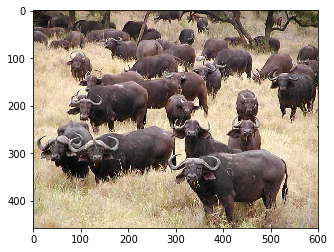

In [3]:
img1 = plt.imread(u'данные/1.jpg')
fig = plt.figure()
plt.imshow(img1)

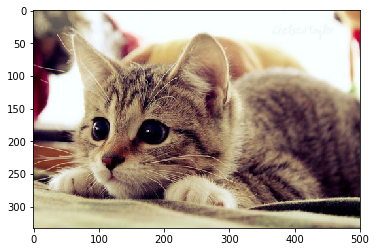

In [4]:
img2 = plt.imread(u'данные/2.jpg')
fig = plt.figure()
plt.imshow(img2)

**1. (1 балл)** На каждом изображении, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель следующим образом [$\lambda x_i,\lambda y_i,r_i,g_i,b_i$], где $x_i$ и $y_i$ — координаты пикселя, $r_i$,$g_i$,$b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

**2. (0.5 балл)** Визуализируйте результаты сегментации.

In [5]:
def transform_plot(img):
    x_dim = img.shape[0]
    y_dim = img.shape[1]
    kmeans = KMeans(n_clusters=3, random_state=0).fit_transform(img.reshape(x_dim * y_dim, 3))
    kmeans = np.floor(kmeans.reshape(x_dim, y_dim, 3)).astype(np.uint8)
    plt.imshow(kmeans)

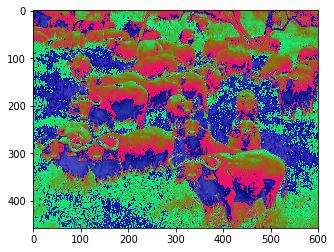

In [6]:
transform_plot(img1)

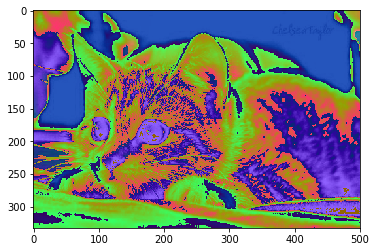

In [7]:
transform_plot(img2)

**3. (1 балл)** 
Выделите сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету.
 
**4. (0.5 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше).

In [8]:
lena = sp.misc.face()

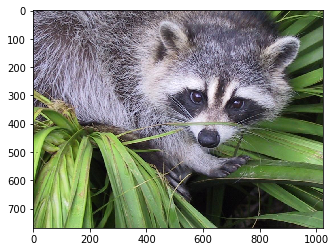

In [9]:
plt.imshow(lena)

In [10]:
new_lena = imresize(lena, (24, 32))

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


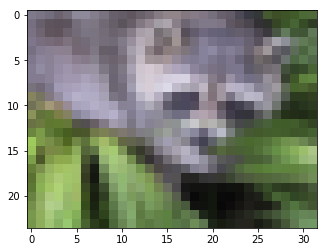

In [11]:
plt.imshow(new_lena)

In [32]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

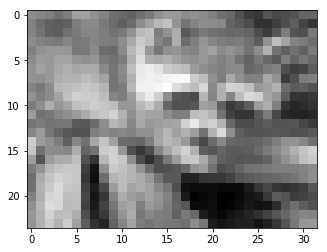

In [34]:
plt.imshow(rgb2gray(new_lena))

In [35]:
graph = image.img_to_graph(new_lena)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / new_lena.std()) + eps
N_REGIONS = 2

###############################################################################
# Visualize the resulting regions

t0 = time.time()
labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                             assign_labels='kmeans')
t1 = time.time()
labels = labels.reshape(new_lena.shape)

plt.figure(figsize=(5, 5))
plt.imshow(new_lena,   cmap=plt.cm.gray)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
                colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
plt.xticks(())
plt.yticks(())
plt.show()


KeyboardInterrupt



**5. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два метода сегментации.

**6. (0.5 балл)**
Насколько хорошо выделяются объекты на изображениях?

### Алгоритм спектральной кластеризации
[статья](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)

* определить матрицу сходства $A$, используя Гауссово ядрор $K$ ($A_{i,j}\sim exp(-\alpha \Vert x_{i}-x_{j}\Vert^{2}) $) или просто матрице смежности (например $A_{i,j}=\delta_{i,j}$),
* построить лапласиан по $A$, например $L=D-A$ - простой, $L_{N}=D^{-1/2}LD^{-1/2}$ - нормализованный, где $D_{i,i}=\sum^{n}_{j}a_{i,j}$ - диагональная матрица,
* свойство лапласиана - $x^{T}Lx=\frac{1}{2}\sum_{i,j=1}^{n}w_{i,j}\Vert x_{i}-x_{j}\Vert^{2}$,
* найти собственные значения $L v=\lambda v$   (или решить обобщенную задачу $L v=\lambda D v$ )
* выбрать $k$ собтвенных векторов $\{ v_{i}, i=1, k \}$, соответствующих $k$ наименьшим (или наибольшим) собственным значениям  $\{ \lambda_{i}, i=1, k \}$ , и задать $k$-мерное подпространство $P^{T}LP$,
* найти кластеры в этом подпространстве.

**7. (2 доп. балла)** Визуализируйте первые несколько собственных векторов, соответствующие самым маленьким собственным числам.
Для этого вам надо более детально ознакомиться с тем, как  работает алгоритм (см. [статью](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)).

Вам может помочь [исходный код sklearn](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/manifold/spectral_embedding_.py#L133) и функции из scipy: eigh, eigsh, lobpcg.


## Сжатие информации с помощью SVD

Выберите любую из картинок.
Приведите ее к серому цвету.

Чёрно-белая картинка - матрица, элементы которой - насыщенность серого цвета каждого из пикселей.

**Замечание.** Главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.


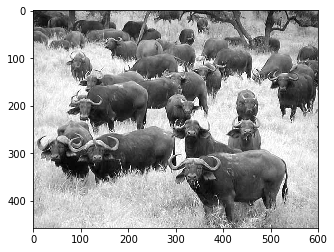

In [16]:
img = plt.imread(u'данные/1.jpg')[:,:,0]# матрица интенсивностей
plt.gray()
imgplot = plt.imshow(img)
plt.show()

**8. (1 балл)** Постройте сингулярное разложение этой матрицы (не центрируя данные). 

**9. (1 балл)** Визуализуйте первую главную компоненту. Что получилось? Почему?

**10. (0.5 балл)** Визуализуйте компоненты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Что получилось и почему?
Сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения?

**11. (0.5 балл)** Как изменится результат, если сначала вы центрируете данные?



In [17]:
u, s, vh = np.linalg.svd(img)

In [18]:
print(u.shape, s.shape, vh.shape)

((458, 458), (458,), (600, 600))


In [25]:
reconstimg = np.matrix(u[:,20:img.shape[0]]) * np.diag(s[20:img.shape[0]]) * np.matrix(vh[20:img.shape[0], :])
def make_fig(img, start=0, end=img.shape[0]):
    reconstimg = np.matrix(u[:,start:end]) * np.diag(s[start:end]) * np.matrix(vh[start:end, :])
    imgplot = plt.imshow(reconstimg)
    plt.show()

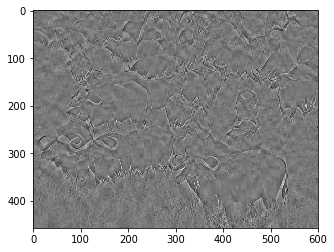

In [26]:
imgplot = plt.imshow(reconstimg)
plt.show()

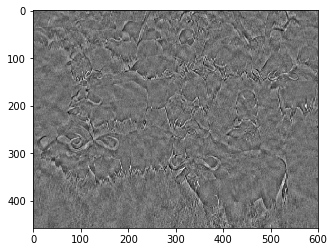

In [27]:
make_fig(img, 20, 100)

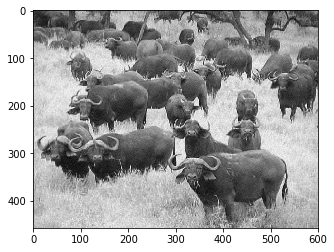

In [28]:
make_fig(img, 0, 120)